# Project \#3: EDA

The data was obtained from the [Yelp Dataset](https://www.yelp.com/dataset). There were the total of 6 datasets: business.json, user.json, tip.json, review.json, checkin.json and photo.json, also mentioned and described in the [Dataset Documentation](https://www.yelp.com/dataset/documentation/main). For the scope of this project, I only used business, user, checkin and tip datesets in order to generate insights. 

The data needed some cleaning, filtering and merging. <br> 
***************************************************************************************************************
**First**, I created the **restaurant_df** out of the business.json file. Eliminated businesses that aren't restaurants, and only kept the restaurants that are open. This file exists as *'restaurant_bus_yelp.csv'*. <br>
***************************************************************************************************************
**Next**, I created the **restaurant_checkin_df** by merging restaurant_df with df_checkin on business_id. This file exists as *'restaurant_checkin.csv'*. It contains business, geolocation, attribute and foot traffic info for 43,039 restaurants.

#### Importing tools and libraries

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import ast 

#### Loading the dataframe from the csv file, obtained from the previous notebook. 
Let's see what we're working with.

In [2]:
rc_filepath = 'yelp_dataset/restaurant_checkin.csv'
rc_df = pd.read_csv(rc_filepath)

In [3]:
rc_df.head(3)

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,date,total
0,0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","2013-02-28 19:53:31, 2013-03-14 18:01:50, 2017...",61
1,1,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries",2019-01-04 01:13:15,19
2,2,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Japanese, Fast Food, Food Court, Restaurants","2014-11-28 18:55:44, 2016-06-12 01:00:30, 2016...",166


#### Data Cleaning

* Index column got doubled-up during the loading. The duplicate can be dropped.

In [4]:
rc_df.drop('Unnamed: 0', axis=1, inplace=True)

* How many restaurants are in this dataframe? Answer: 43,039

In [5]:
rc_df.shape

(43039, 14)

In [6]:
rc_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'attributes',
       'categories', 'date', 'total'],
      dtype='object')

* Are all of them located in the U.S.? Answer: No.

In [7]:
rc_df.state.unique()

array(['IL', 'ON', 'AZ', 'OH', 'QC', 'PA', 'NV', 'NC', 'SC', 'AB', 'WI',
       'TX', 'CO', 'BC', 'HPL', 'NY', 'FL', 'VT', 'HI', 'MB', 'OR', 'WA',
       'AL', 'CA', 'VA'], dtype=object)

ON, QC, AB, BC, HPL, MB <-- Not in the U.S.

In [8]:
rc_df.sample(20)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,date,total
38192,Cu5icjH_psCatgvN4fU1-A,Carnaval Court,3475 Las Vegas Blvd S,Las Vegas,NV,89109,36.118714,-115.171866,4.0,408,"{'BikeParking': 'False', 'RestaurantsReservati...","Music Venues, Bars, Casinos, Arts & Entertainm...","2010-03-18 04:14:34, 2010-05-04 03:53:24, 2010...",30364
11164,Kbbm6Vd5UdbP10dwjBghRw,In-N-Out Burger,3882 Blue Diamond Rd,Las Vegas,NV,89139,36.040628,-115.191256,4.0,361,"{'RestaurantsDelivery': 'False', 'RestaurantsG...","Burgers, Fast Food, Restaurants","2010-02-16 04:00:48, 2010-04-21 19:58:50, 2010...",85804
41629,UyHRN8FbSuk5c46Mu5AOtw,Sunrise Caribbean Restaurant,148 West Dr,Brampton,ON,L6T 2J5,43.707978,-79.733477,3.0,5,"{'GoodForKids': 'True', 'RestaurantsDelivery':...","Caribbean, Restaurants","2011-11-30 18:44:39, 2016-07-04 17:43:52, 2017...",82
37459,qtsrM6Xxh1LqxG0X6K6tuQ,The Pizza Company - Baldwin,5200 Brownsville Rd,Baldwin,PA,15236,40.343211,-79.985589,4.0,9,"{'RestaurantsDelivery': 'True', 'RestaurantsRe...","Pizza, Restaurants, Chicken Wings, Sandwiches","2015-04-20 00:58:58, 2016-03-26 21:05:39, 2017...",82
15906,Mb8qJps-OBFmDALFo5dkJA,A Cut Above Restaurant,2275 Kyle Canyon Rd,Las Vegas,NV,89124,36.325700,-115.328982,2.5,27,"{'Ambience': ""{'touristy': False, 'hipster': F...","Steakhouses, Restaurants, American (Traditional)","2012-08-05 00:19:41, 2012-12-22 20:36:17, 2013...",418
41802,lLindjep86GA3PeKMl55Og,Carl's Jr.,2002 N Country Club Dr,Mesa,AZ,85201,33.451876,-111.840226,1.5,19,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Fast Food, Restaurants, Mexican","2010-11-25 00:08:23, 2010-12-22 23:30:03, 2011...",1258
17844,_Mb_Rvw5VsQLWLwc8mA0xg,Austin's Bar & Grill,11625 Elbow Drive Southwest,Calgary,AB,T2W 1G8,50.949329,-114.086230,3.5,22,"{'NoiseLevel': ""u'quiet'"", 'RestaurantsAttire'...","Restaurants, Pubs, American (Traditional), Bar...","2011-07-31 20:23:00, 2011-08-13 16:03:03, 2011...",544
34152,L_1xRIo-knpK9AdZ3GwSIw,Gibson's Take-Out,10731 Frankstown Rd,Pittsburgh,PA,15235,40.461559,-79.841390,3.0,3,"{'RestaurantsPriceRange2': '1', 'WiFi': ""u'no'...","Caterers, Event Planning & Services, Restauran...",2013-03-05 22:39:27,19
37100,pHpU8lnnxMuPWRHOysuMIQ,Salut Kitchen Bar,"1435 E University Dr, Ste 12",Tempe,AZ,85281,33.421413,-111.914915,4.0,786,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Breakfast & Brunch, Food, Beer, Wine & Spirits...","2013-04-09 18:48:58, 2013-04-12 00:38:38, 2013...",47416
1621,0cCPUHqMTGBMp9UrhAn-Jg,Café Le Spot,1015 Rue Lionel-Daunais,Boucherville,QC,J4B 0B1,45.592909,-73.431734,4.5,7,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Cafes, Local Flavor, Coffee & Tea, Restaurants...","2013-10-24 18:46:56, 2013-10-26 19:06:45, 2013...",229


* Just to get an approximate idea of how many good (5-star) restaurants there are and where they are located.

In [128]:
stars = rc_df.groupby(['name', 'city'])['stars'].max().sort_values(ascending = False)
stars[0:50]

name                               city           
LV Pro Tint                        Las Vegas          5.0
Grounded Cafe & Beanery            Pittsburgh         5.0
Gypsy Foods Cafe                   Las Vegas          5.0
Pretzel Time                       Las Vegas          5.0
Pret A Manger                      Las Vegas          5.0
Chavelas Water & Ice-Cream Eatery  Glendale           5.0
Tortas Manny                       Phoenix            5.0
Taqueria Robert                    Concord            5.0
Maskadores Taco Shop               Scottsdale         5.0
Guapo                              Pittsburgh         5.0
Chef @ Your Home                   Las Vegas          5.0
Tortilleria San Diego              Las Vegas          5.0
Mastakos                           Henderson          5.0
Charley's Grilled Subs             Strongsville       5.0
Pots n Tots                        Madison            5.0
Grocery Station                    Scottsdale         5.0
Groceria Merante     

* Certain columns won't be used for this project, therefore I am dropping some geolocation details, and checkin timestamps. 

In [ ]:
rc_df.drop(['postal_code', 'latitude', 'longitude', 'date'], axis=1, inplace=True)

In [14]:
rc_df.sample(2)

,business_id,name,address,city,state,stars,review_count,attributes,categories,total
40156,zzsOLFhgUw8gnjLTVVItFA,La Purisima Bakery,4533 W Glendale Ave,Glendale,AZ,4.5,138,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Bakeries, Restaurants, Food",4072
7835,YKGb41Io_6mRsm4Bee7aOQ,Firebirds Wood Fired Grill,"211 Park Ave, Ste 109",Beachwood,OH,3.5,109,"{'RestaurantsTableService': 'True', 'BestNight...","Wine Bars, Restaurants, Steakhouses, Nightlife...",2476


In [41]:
# To remove the restaurants outside the U.S.
non_us = rc_df[(rc_df['state'] == 'ON') | (rc_df['state'] == 'QC') | (rc_df['state'] == 'AB') | \
              (rc_df['state'] == 'BC') | (rc_df['state'] == 'HPL') | (rc_df['state'] == 'MB')].index

# ON, QC, AB, BC, HPL, MB <-- foreign entities.
rc_df.drop(non_us, inplace=True)


In [42]:
rc_df.shape

(25446, 10)

In [45]:
rc_df.rename(columns = {'total':'total_checkins'}, inplace = True)

In [51]:
rc_df = rc_df.reset_index(drop=True)

* Checking for nulls: missing address is not a big deal, but attributes might be.

In [52]:
null_columns=rc_df.columns[rc_df.isnull().any()]
rc_df[null_columns].isnull().sum()

address       246
attributes    227
dtype: int64

In [53]:
rc_df = rc_df.dropna(axis=0, subset=['attributes'])

In [54]:
rc_df.shape

(25219, 10)

* A useful way to save a dataframe that some aggregations have been performed on: *pickling*.

In [55]:
import pickle
with open('rc_df.pickle', 'wb') as to_write:
    pickle.dump(rc_df, to_write)

To un-pickle (even from a different notebook): 
```python
import pickle
with open('yelp_dataset/rc_df.pickle', 'rb') as read_file:
    my_df = pickle.load(read_file)
    ```

Now, we have the dataframe rc_df, containing only American restaurants, without null values.

### EDA

#### Features to explore:


X (predictor variables): | y (values to be predicted):
-------------------------|----------------------------
number of reviews|            
number of checkins|    stars (good vs. bad)
attributes (alcohol, good for kids, live music etc.)|

* The most reviewed and the most and the most attended restaurants are in Las Vegas, it appears.

In [126]:
rc_df.groupby('city')[[ 'total_checkins']].count().sort_values(by = 'total_checkins', ascending=False)[0:20]

,total_checkins
city,
Las Vegas,4298
Phoenix,2714
Charlotte,2000
Pittsburgh,1704
Cleveland,1026
Scottsdale,937
Mesa,825
Madison,733
Tempe,646


* 475 unique cities. What are the top cities? It appears to be Vegas.

In [69]:
rc_df.city.nunique()

475

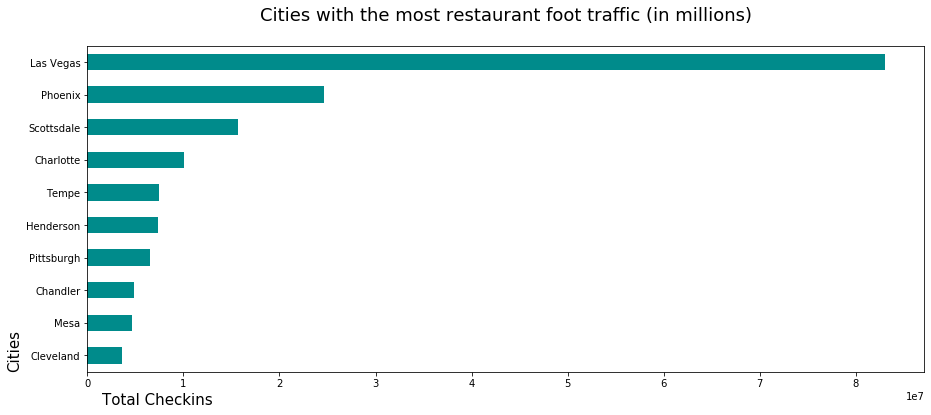

In [119]:
plt.figure(figsize=(15,6))
rc_df.groupby('city').sum()['total_checkins'].sort_values(ascending=True).tail(10)\
                .plot(kind='barh',color='Darkcyan')
plt.title('Cities with the most restaurant foot traffic (in millions)',fontsize=18, pad=25.0) 
plt.xlabel('Total Checkins', fontsize=15, horizontalalignment='right', x=0.15, y=1.0)
plt.ylabel('Cities', fontsize=15, horizontalalignment='left', y=0.0)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

In [124]:
rc_df[['name', 'review_count', 'city', 'stars']].sort_values(ascending = False, by = 'review_count')[0:50]

,name,review_count,city,stars
9976,Bacchanal Buffet,10129,Las Vegas,4.0
14411,Mon Ami Gabi,9264,Las Vegas,4.0
17964,Wicked Spoon,7383,Las Vegas,3.5
10173,Hash House A Go Go,6751,Las Vegas,4.0
11757,Earl of Sandwich,5232,Las Vegas,4.5
2735,Yardbird Southern Table & Bar,4828,Las Vegas,4.5
25008,The Buffet At Wynn,4803,Las Vegas,3.5
17704,Secret Pizza,4803,Las Vegas,4.0
9461,The Cosmopolitan of Las Vegas,4740,Las Vegas,4.0
10965,Gordon Ramsay Hell's Kitchen,4672,Las Vegas,4.5


We can confirm, that the busiest and the most reviewed restaurants are in Las Vegas.

* However, not all the highest-rated places are located in Las Vegas. People seem to visit and review a lot, but those reviews appear to have some variance. What city can be considered a beacon of quality, rather than quantity, when it comes to customer satisfaction?

In [130]:
beacon_df = rc_df[['city', 'review_count', 'stars']].groupby(['city']).\
         agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by = 'review_count', ascending = False)

It appears, that some places (like Scottsdale and Pittsburgh) tend to have slightly higher average reviews, than Las Vegas, but it also appears, that they also have less restaurants. 

In [131]:
beacon_df.head(20)

,review_count,stars
city,,
Las Vegas,1212296,3.511517
Phoenix,415815,3.424282
Scottsdale,214751,3.702775
Charlotte,212429,3.395250
Pittsburgh,157315,3.577465
Tempe,114121,3.491486
Henderson,113523,3.467851
Mesa,91033,3.355758
Chandler,83673,3.489267


* Foot traffic is not necessarily the most reliable metric for the restaurant quantity per city. Where are the most businesses actually located?

In [132]:
numbers_per_city = rc_df[['city', 'business_id']].groupby(['city'])['business_id'].\
                   agg('count').sort_values(ascending = False)

In [135]:
numbers_per_city.rename(columns={'business_id': 'number_of_restaurants'}, inplace = True)

city
Las Vegas             4298
Phoenix               2714
Charlotte             2000
Pittsburgh            1704
Cleveland             1026
                      ... 
Middleburg Hts.          1
Mentor On the Lake       1
Mentor On the            1
Medina Township          1
4321 W Flamingo Rd       1
Length: 475, dtype: int64

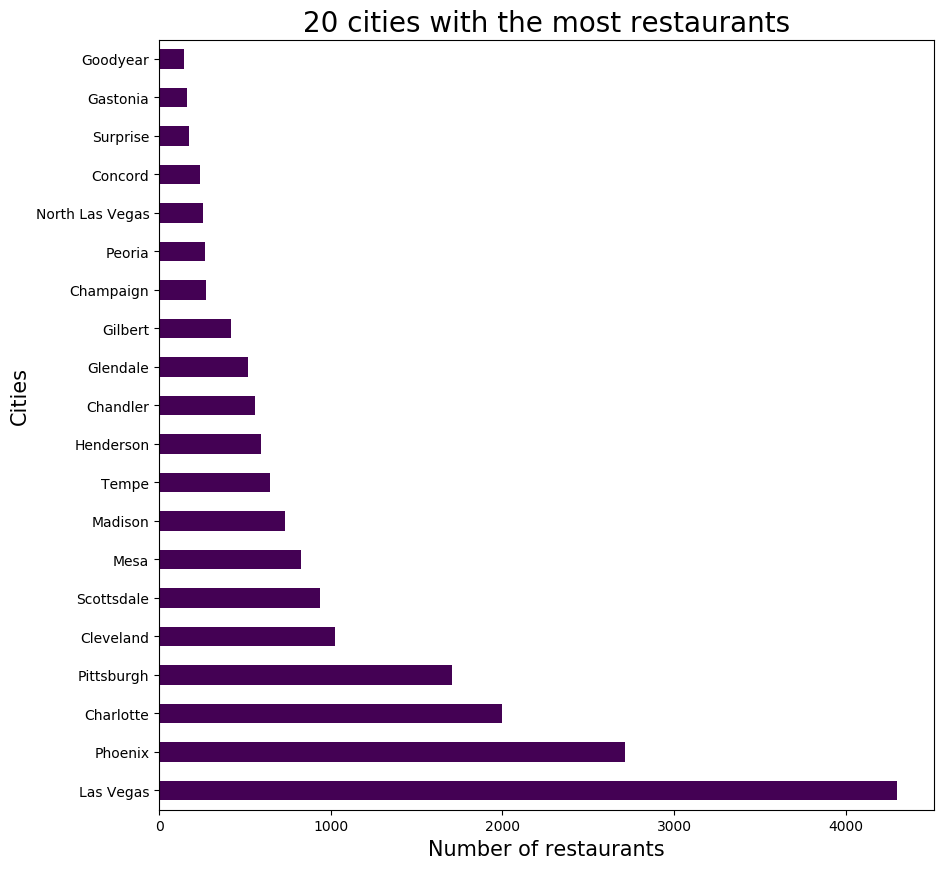

In [487]:
numbers_per_city[0:20].sort_values(ascending = False).  \
                plot(kind='barh', stacked = False, figsize = [10, 10], colormap = 'viridis')
plt.xlabel('Number of restaurants', fontsize=15)
plt.ylabel('Cities', fontsize=15, horizontalalignment='left', y=0.5)
plt.title("20 cities with the most restaurants", fontsize = 20);

Vegas is still the leader.

* How are the stars actually distributed? Do people tend to be more harsh or more generous?

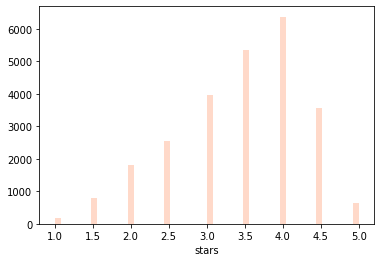

In [156]:
sns.distplot(rc_df.stars, kde = False, color = 'lightsalmon');

As we can see from the graph, people tend to give 3.5-4 star reviews, staying away from extremes, like 1 or 5 stars.

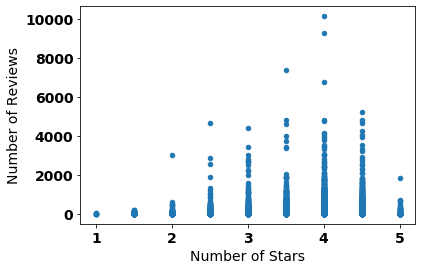

In [213]:
font = {'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)
vegas_df.plot.scatter(x='stars', y='review_count')
plt.xlabel("Number of Stars")
plt.ylabel("Number of Reviews")

plt.show()
plt.rcdefaults()

### Las Vegas Data

Since Vegas appears to be a suitable sample space for this experiment, it makes sense to use the data for this city.

In [160]:
vegas_df = rc_df[rc_df.city == 'Las Vegas']
vegas_df

,business_id,name,address,city,state,stars,review_count,attributes,categories,total_checkins
8,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,NaN,Las Vegas,NV,4.5,11,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Food, Food Trucks, Restaurants, Pizza",61
10,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,2.5,37,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Fast Food, Restaurants",6718
21,Yr_w9lakJrKMyEG_hI6zbA,Fat Moe's Pizza & Wings,"6125 W Tropicana Ave, Ste F",Las Vegas,NV,4.0,141,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Pizza, Salad, Burgers, Restaurants",2203
26,AN0bWhisCf6LN9eHZ7DQ3w,Los Olivos Ristorante,3759 E Desert Inn Rd,Las Vegas,NV,5.0,222,"{'WiFi': ""u'free'"", 'RestaurantsPriceRange2': ...","Restaurants, Italian",3085
28,AtD6B83S4Mbmq0t7iDnUVA,Veggie House,"5115 Spring Mountain Rd, Ste 203",Las Vegas,NV,4.5,1142,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Restaurants, Specialty Food, Japanese, Sushi B...",65728
...,...,...,...,...,...,...,...,...,...,...
25415,ak-f8IV0ZdDeI4oYnjA1Pw,Habaneros Taco Grill,4225 S Fort Apache Rd,Las Vegas,NV,4.0,286,"{'WheelchairAccessible': 'True', 'RestaurantsG...","Mexican, Fast Food, Restaurants, Tacos",18436
25419,PIXl4WvAqjl2w9Lj81zXvQ,Zest - Bistro & Bar,"10670 Southern Highlands Pkwy, Ste 102",Las Vegas,NV,4.5,744,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...","American (New), Karaoke, Restaurants, Lounges,...",24232
25431,d4Mw96Hb6ZoHEL2AxqGrbg,Ice House America,1735 E Warm Springs Rd,Las Vegas,NV,5.0,4,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Food, American (New), Local Services",82
25434,9r6ijZgxDLJFysxIohtTcQ,Northern China Restaurant,4850 W Flamingo Rd,Las Vegas,NV,2.5,3,"{'BusinessParking': ""{'garage': False, 'street...","Food, Restaurants, Chinese",124


4,298 restaurants located in Las Vegas, according to Yelp.

In [162]:
vegas_df.business_id.nunique() 

4298

### Categories

Apparently, there's a lot of categories to choose from. What would be the more common ones, and how many businesses share it?

In [176]:
vegas_df.categories.nunique()

3224

Quick sanity check:

In [186]:
possible_cats = set(vegas_df.categories.unique())

In [188]:
len(possible_cats)

3224

In [184]:
vegas_df[vegas_df['categories'].str.contains('bar')]

,business_id,name,address,city,state,stars,review_count,attributes,categories,total_checkins
16497,26aZ1ZojTkITAfsk_Lxtdw,Gospel Brunch,1700 E Flamingo Rd,Las Vegas,NV,4.5,3,"{'HappyHour': 'True', 'Ambience': ""{'touristy'...","Gay Bars, Cabaret, Buffets, Arts & Entertainme...",40
16989,v6LhGCvLdmgETek9FgrXxw,Hamburger Mary's,1700 E Flamingo Rd,Las Vegas,NV,4.0,145,"{'RestaurantsTableService': 'True', 'BestNight...","Restaurants, Bars, Nightlife, American (Tradit...",2287
18847,GRWIABHedj1m8DDoAuTIMg,Centerfolds Cabaret kept as per website,4416 Paradise Rd,Las Vegas,NV,3.5,44,"{'WiFi': ""'no'"", 'OutdoorSeating': 'False', 'B...","Arts & Entertainment, American (Traditional), ...",1069


* The code below shows all the categories, "flattened-out". Unique combos, but not unique words. Also, very long output, as it lists each and every unique combo of categories.

In [ ]:
restaurant_cats = []
for cat in possible_cats:
    if 'restaurant' in cat.lower():
        print(cat)
        restaurant_cats.append(cat)

* The code below works to show how many times a certain category appears in the dataset. **Note:** This code is borrowed from @davidgrossman github page. It could still use some optimization. 

In [191]:
from collections import defaultdict
category_counts = defaultdict(int)

for cat in list(vegas_df.categories):
    category_counts[cat] += 1

In [192]:
category_counts_list = [(k, v) for k, v in category_counts.items()]
for (k, v) in sorted(category_counts_list, key = lambda x: -1*x[1]):
    print("{:<25}: {}".format(k, v))


Mexican, Restaurants     : 78
Restaurants, Mexican     : 75
Restaurants, Pizza       : 48
Restaurants, Sandwiches, Fast Food: 41
Pizza, Restaurants       : 39
Sandwiches, Restaurants, Fast Food: 35
Restaurants, Chinese     : 30
Chinese, Restaurants     : 28
Fast Food, Mexican, Restaurants: 21
Italian, Restaurants     : 17
Mexican, Fast Food, Restaurants: 16
Burgers, Fast Food, Restaurants: 14
Restaurants, Mexican, Fast Food: 14
Thai, Restaurants        : 14
Restaurants, Italian     : 13
Restaurants, Burgers, Fast Food: 13
Restaurants, Fast Food, Burgers: 13
American (Traditional), Restaurants: 12
Restaurants, Thai        : 12
Restaurants, American (New): 12
Fast Food, Restaurants, Mexican: 10
Restaurants, Sandwiches  : 10
Restaurants, Vietnamese  : 9
Mexican, Restaurants, Fast Food: 9
Sandwiches, Restaurants  : 9
Japanese, Restaurants, Sushi Bars: 9
Restaurants, American (Traditional): 9
Fast Food, Restaurants, Burgers: 9
Vietnamese, Restaurants  : 9
Restaurants, Japanese    : 9
Buffet

Pizza, Burgers, Chicken Wings, Restaurants, American (New), Italian: 1
Restaurants, Greek, Mediterranean: 1
Restaurants, Food, Asian Fusion, Japanese, Hawaiian: 1
Pretzels, Food, Hot Dogs, Food Stands, Restaurants: 1
Mexican, Tacos, Restaurants, Breakfast & Brunch: 1
Restaurants, Bars, Nightlife, Pubs, American (Traditional): 1
Seafood, Restaurants, Korean, Sushi Bars: 1
Laotian, Noodles, Restaurants, Beer, Wine & Spirits, Food, Vegetarian, Thai, Food Delivery Services, Beer Bar, Wine Bars, Asian Fusion, Seafood, Bars, Nightlife: 1
Kosher, Restaurants, Steakhouses, Persian/Iranian: 1
Event Planning & Services, Bars, Venues & Event Spaces, Nightlife, Restaurants, Mexican: 1
Food, Donuts, Restaurants: 1
Nightlife, Bars, Restaurants, Pubs, American (Traditional): 1
Pubs, Irish Pub, Bars, Nightlife, Restaurants, Irish, American (Traditional): 1
Chinese, Food Court, Restaurants: 1
Food, Cafes, Coffee Roasteries, Desserts, Coffee & Tea, Beer, Wine & Spirits, Sandwiches, Restaurants: 1
Coffee

Real Estate, Home Services, Real Estate Services, Restaurants, Mexican: 1
Pizza, Specialty Food, Restaurants, Pasta Shops, Vegan, Food: 1
Mediterranean, Armenian, Kebab, Middle Eastern, Restaurants, Event Planning & Services, Venues & Event Spaces: 1
Food Stands, Food, Street Vendors, Restaurants: 1
Restaurants, Bars, American (Traditional), Nightlife: 1
Asian Fusion, Japanese, Restaurants, Hawaiian: 1
Seafood, Filipino, Restaurants, Barbeque: 1
American (New), Karaoke, Restaurants, Lounges, American (Traditional), Steakhouses, Bars, Italian, Nightlife: 1
Restaurants, Food, American (New), Local Services: 1
Food, Asian Fusion, Food Trucks, Restaurants: 1


Let's look into the categories in greater detail. The code below breaks down the categories into individual entities and gives their count throughout the dataframe.

In [252]:
cat_count = defaultdict(int)
# load df column categories into "cat"
cat = vegas_df['categories']
# iterate through row
for row in cat:
    # split each row
    row = row.split(', ')
    # iterate through items in each row
    for item in row:
        # add item to dictionary and counter +1
        cat_count[item] += 1

# sort dictionary in descending order per value
print({k: v for k, v in sorted(cat_count.items(), key=lambda item: item[1], reverse=True)})


{'Restaurants': 8596, 'Food': 2436, 'Fast Food': 1710, 'Nightlife': 1468, 'Bars': 1404, 'American (Traditional)': 1340, 'Mexican': 1276, 'Sandwiches': 1154, 'Breakfast & Brunch': 1048, 'Burgers': 1010, 'Pizza': 928, 'American (New)': 900, 'Chinese': 596, 'Italian': 570, 'Seafood': 564, 'Coffee & Tea': 524, 'Event Planning & Services': 518, 'Japanese': 506, 'Salad': 478, 'Chicken Wings': 446, 'Asian Fusion': 428, 'Cafes': 380, 'Sports Bars': 370, 'Desserts': 356, 'Sushi Bars': 328, 'Steakhouses': 328, 'Arts & Entertainment': 316, 'Tacos': 304, 'Barbeque': 292, 'Delis': 292, 'Caterers': 278, 'Specialty Food': 272, 'Pubs': 236, 'Bakeries': 234, 'Cocktail Bars': 234, 'Juice Bars & Smoothies': 232, 'Vegan': 224, 'Mediterranean': 212, 'Diners': 202, 'Thai': 202, 'Buffets': 184, 'Vegetarian': 180, 'Food Trucks': 176, 'Beer': 176, 'Wine & Spirits': 176, 'Hawaiian': 174, 'Casinos': 174, 'Soup': 172, 'Ice Cream & Frozen Yogurt': 172, 'Hotels & Travel': 166, 'Korean': 162, 'Noodles': 160, 'Lounge

* Preserving the vegas_df for further use.

In [193]:
with open('vegas_df.pickle', 'wb') as to_write:
    pickle.dump(rc_df, to_write)

## Attributes
(Things get a little daunting here)

Let's look at a sample:

In [198]:
vegas_df['attributes'][8]

"{'RestaurantsDelivery': 'False', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsReservations': 'False'}"

Looks like the Blue Burrito Grille doesn't do delivery or reservations.

In [344]:
vegas_df.head(2)

,business_id,name,address,city,state,stars,review_count,attributes,categories,total_checkins
0,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,NaN,Las Vegas,NV,4.5,11,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Food, Food Trucks, Restaurants, Pizza",61
1,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,2.5,37,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Fast Food, Restaurants",6718


This is how we discover, that what looked like a dictionary is actually a *string*.

In [211]:
length = 0
loc = 0

for i in range(0, len(vegas_df)):
    if len(vegas_df['attributes'][i]) > length:
        length = len(vegas_df['attributes'][i])
        loc = i
        
vegas_df['attributes'][loc]

'{\'BusinessAcceptsBitcoin\': \'False\', \'RestaurantsReservations\': \'True\', \'WheelchairAccessible\': \'True\', \'Smoking\': "u\'outdoor\'", \'BusinessAcceptsCreditCards\': \'True\', \'RestaurantsTakeOut\': \'True\', \'Alcohol\': "u\'full_bar\'", \'HappyHour\': \'True\', \'RestaurantsTableService\': \'True\', \'Caters\': \'False\', \'HasTV\': \'True\', \'GoodForKids\': \'True\', \'OutdoorSeating\': \'True\', \'DriveThru\': \'False\', \'NoiseLevel\': "u\'average\'", \'RestaurantsAttire\': "u\'casual\'", \'Open24Hours\': \'False\', \'WiFi\': "u\'free\'", \'RestaurantsGoodForGroups\': \'True\', \'RestaurantsCounterService\': \'False\', \'GoodForMeal\': "{\'dessert\': False, \'latenight\': False, \'lunch\': False, \'dinner\': True, \'brunch\': False, \'breakfast\': False}", \'BestNights\': "{\'monday\': False, \'tuesday\': False, \'friday\': False, \'wednesday\': True, \'thursday\': False, \'sunday\': False, \'saturday\': True}", \'CoatCheck\': \'False\', \'DogsAllowed\': \'False\', \'

In [205]:
vegas_df['name'][loc]

'Royal Britannia Gastro Pub'

It appears, that Royal Brittania Gastro Pub has the most attributes.

#### Attention: Starting from this point I deviate from using vegas_df, and pivot back to the business_json file, for the reasons explained below.

* In order to access the attributes in the proper format, I had to bring the json file back into the picture. <br>
I'm performing the same data cleaning on it as I previously did on the csv file: removing non-restaurants, non-American businesses, keeping only Las Vegas.

In [286]:
data_json = pd.read_json("yelp_dataset/yelp_academic_dataset_business.json", lines=True)
data_json = data_json[data_json['categories'].str.contains('Restaurants',case=False, na=False)] 

# To remove the restaurants outside the U.S.
non_us = data_json[(data_json['state'] == 'ON') | (data_json['state'] == 'QC') | (data_json['state'] == 'AB') | \
              (data_json['state'] == 'BC') | (data_json['state'] == 'HPL') | (data_json['state'] == 'MB')].index

# ON, QC, AB, BC, HPL, MB <-- foreign entities.
data_json.drop(non_us, inplace=True)
data_json.dropna(inplace=True, axis=0, subset=['attributes'])

In [287]:
# Open places in Las Vegas, to finalize the filtering:
data_json = data_json[data_json.city == 'Las Vegas']
data_json = data_json[data_json['is_open']==1]

In [288]:
data_json.shape

(4334, 14)

* Note: data_json should be identical to vegas_df. The reason I created it was that I needed the json to loop over the attributes. I couldn't do it with the csv file, as it completely obliterates the dictionary structure.

#### Attributes: does the business take credit cards?

The code below loops through the attributes in the json file as a dictionary, then gives a verdict: whether the business **takes credit cards or not**. It saves them into a list, which we will consequently convert into the dataframe called **result_cc**. Then this dataframe will be merged with data_json on the basis of index (all original indeces were kept for this purpose).

In [297]:
for idx, row in data_json.iterrows():
    row['BusinessAcceptsCreditCards'] = row['attributes'].get('BusinessAcceptsCreditCards', False)
    
    print(idx, row['BusinessAcceptsCreditCards'])

86 True
101 True
157 True
238 True
246 True
271 False
308 True
315 True
364 True
450 True
484 True
617 True
677 True
692 True
701 True
738 True
752 True
758 True
822 True
924 True
973 True
988 True
1019 False
1068 True
1091 True
1100 True
1121 True
1171 True
1221 True
1251 True
1255 True
1265 False
1284 True
1286 True
1321 True
1439 True
1443 True
1607 True
1655 True
1768 True
1883 True
1946 True
1989 True
2043 True
2101 True
2128 True
2154 True
2165 True
2217 True
2306 True
2368 False
2379 True
2380 True
2386 True
2414 True
2429 True
2471 True
2558 True
2563 True
2575 True
2586 True
2681 True
2694 True
2719 True
2750 True
2910 True
2990 True
3115 True
3125 True
3137 True
3149 True
3229 True
3300 True
3332 True
3333 True
3390 True
3393 False
3422 True
3432 True
3438 True
3461 True
3476 True
3477 True
3533 True
3554 True
3653 True
3756 True
3765 True
3850 True
3885 True
3931 True
3956 True
4028 False
4030 True
4076 True
4077 True
4125 True
4172 True
4193 True
4227 True
4269 True
4382 Tr

42887 True
42932 True
42967 True
43006 False
43066 True
43077 True
43125 True
43143 True
43168 True
43201 True
43223 True
43238 True
43246 True
43270 True
43401 True
43424 True
43491 True
43524 True
43538 True
43560 True
43930 True
43965 True
44084 True
44190 True
44273 True
44443 True
44461 True
44512 True
44517 True
44566 True
44630 True
44716 True
44717 True
44757 True
44778 True
44804 True
44921 True
44990 True
45024 True
45047 True
45089 True
45153 True
45175 True
45202 True
45222 True
45365 False
45404 True
45421 True
45429 True
45456 True
45579 True
45581 True
45609 True
45637 True
45643 True
45657 True
45662 True
45665 True
45824 True
45894 True
46103 True
46112 True
46132 True
46157 True
46407 True
46490 True
46542 True
46550 True
46621 True
46643 True
46684 True
46693 True
46698 True
46767 True
46825 True
46859 True
46988 True
46996 True
47003 True
47085 False
47139 True
47167 True
47219 True
47290 True
47305 True
47370 True
47405 True
47455 True
47500 True
47607 True
47632 T

82801 True
82882 True
82934 True
82944 True
83020 True
83037 True
83040 True
83048 True
83057 True
83119 True
83135 True
83179 True
83240 True
83253 True
83305 True
83385 True
83415 True
83555 True
83584 True
83613 True
83616 True
83763 False
83979 True
84022 True
84091 True
84163 True
84171 True
84201 True
84308 True
84343 True
84482 True
84490 False
84504 False
84614 True
84617 True
84631 True
84680 True
84699 True
84722 True
84757 True
84798 True
84833 True
84998 True
85020 True
85054 True
85107 True
85169 True
85173 True
85320 False
85336 True
85362 True
85413 True
85459 True
85471 True
85478 True
85484 True
85563 True
85564 True
85573 False
85581 True
85618 True
85632 True
85751 True
85780 True
85798 True
85818 True
85916 True
85974 True
85990 True
86016 True
86062 True
86215 True
86429 True
86612 True
86652 True
86798 True
86804 True
86808 True
86819 False
86850 False
86906 True
86991 True
87026 True
87045 True
87153 True
87188 True
87194 True
87255 True
87271 True
87277 True
873

126648 True
126678 True
126679 True
126706 True
126800 True
126860 True
126943 True
126964 True
126969 True
126985 True
127162 False
127170 True
127176 True
127188 True
127198 True
127235 True
127312 True
127363 True
127366 True
127395 True
127404 True
127461 True
127655 True
127694 True
127701 True
127743 True
127765 False
127774 True
127781 True
127802 True
127874 False
127896 False
127936 True
127988 True
127990 True
128153 False
128311 True
128312 True
128323 True
128339 True
128360 True
128380 True
128388 False
128404 True
128605 True
128616 True
128663 False
128862 True
129002 True
129175 True
129280 True
129340 True
129362 True
129415 True
129449 True
129465 True
129469 True
129662 True
129748 True
129964 True
130085 True
130148 True
130314 True
130351 True
130375 True
130397 True
130465 True
130514 True
130551 True
130617 True
130659 True
130675 False
130692 True
130700 True
130701 True
130704 True
130725 True
130761 True
130858 True
130897 True
130928 True
130981 True
131009 T

163211 True
163248 True
163255 True
163260 True
163262 True
163367 True
163460 True
163552 True
163653 True
163660 True
163697 True
163840 True
163895 True
164030 True
164051 True
164088 True
164093 True
164144 True
164240 True
164245 True
164458 True
164521 True
164529 True
164555 True
164672 True
164777 True
164782 True
164824 True
164835 True
164912 True
164925 True
164976 True
164978 True
165013 True
165028 True
165037 False
165102 True
165140 True
165166 True
165187 True
165213 True
165246 True
165267 False
165337 True
165350 True
165354 True
165400 True
165553 True
165585 True
165645 True
165673 True
165675 False
165886 True
165912 True
165968 True
166038 True
166075 True
166144 True
166176 True
166206 True
166315 True
166394 True
166476 True
166679 True
166760 True
166784 True
166799 True
166805 True
166806 True
166868 False
166873 True
166940 True
167018 True
167043 False
167051 True
167059 True
167283 True
167296 True
167391 True
167415 True
167424 True
167445 True
167571 True

204875 True
204913 True
204920 False
204927 False
204952 True
204987 True
205096 True
205151 True
205154 True
205170 True
205210 True
205259 True
205266 True
205336 True
205355 True
205366 True
205374 True
205380 True
205391 False
205436 True
205523 True
205564 True
205600 True
205629 True
205643 True
205665 True
205740 True
205796 True
205927 True
206011 True
206021 True
206082 True
206160 True
206165 True
206169 True
206203 True
206223 True
206245 True
206247 True
206249 True
206278 True
206297 True
206325 False
206358 True
206374 True
206375 True
206401 True
206458 True
206526 True
206536 True
206560 False
206563 True
206565 True
206586 True
206626 True
206656 True
206685 True
206689 True
206723 True
206782 True
206801 True
206816 True
206838 True
206863 True
206884 True
206901 True
206914 True
207003 True
207036 True
207074 False
207161 True
207192 True
207200 False
207345 True
207542 True
207601 True
207604 True
207631 True
207665 True
207729 True
207751 True
207754 True
207774 Tr

Now, we convert the results of the loop (list) into the dataframe.

In [330]:
result_cc = []

for idx, row in data_json.iterrows():
    result_cc.append(
        {
            'index':  int(idx),
            'takes_cards': row['attributes'].get('BusinessAcceptsCreditCards', False)
            
        }
    )

result_cc = pd.DataFrame(result_cc)

In [331]:
data_json.tail(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
209287,9r6ijZgxDLJFysxIohtTcQ,Northern China Restaurant,4850 W Flamingo Rd,Las Vegas,NV,89103,36.116440,-115.206268,2.5,3,1,"{'BusinessParking': '{'garage': False, 'street...","Food, Restaurants, Chinese",None
209317,tv-WIUQifcp5J9pUKoiE3Q,Dragon Grille,,Las Vegas,NV,89119,36.076518,-115.153343,4.0,69,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Food, Asian Fusion, Food Trucks, Restaurants","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


In [335]:
result_cc.tail()

,takes_cards
index,
209145,True
209170,True
209260,False
209287,False
209317,True


In [333]:
result_cc = result_cc.set_index('index')

In [334]:
result_cc.head()

,takes_cards
index,
86,True
101,True
157,True
238,True
246,True


data_json needs some clean-up: we don't need all those columns.

In [337]:
to_drop = ['address', 'postal_code', 'latitude','longitude', 'is_open', 'hours']
data_json = data_json.drop(to_drop, 1)

In [338]:
data_json.head()

,business_id,name,city,state,stars,review_count,attributes,categories
86,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,Las Vegas,NV,4.5,11,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Food, Food Trucks, Restaurants, Pizza"
101,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,Las Vegas,NV,2.5,37,"{'OutdoorSeating': 'False', 'Alcohol': 'u'none...","Fast Food, Restaurants"
157,Yr_w9lakJrKMyEG_hI6zbA,Fat Moe's Pizza & Wings,Las Vegas,NV,4.0,141,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Pizza, Salad, Burgers, Restaurants"
238,AN0bWhisCf6LN9eHZ7DQ3w,Los Olivos Ristorante,Las Vegas,NV,5.0,222,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","Restaurants, Italian"
246,AtD6B83S4Mbmq0t7iDnUVA,Veggie House,Las Vegas,NV,4.5,1142,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Restaurants, Specialty Food, Japanese, Sushi B..."


Now, we will join these two dataframes, data_json and result_cc on index, in order to obrain the new dataframe: new_cc.

In [339]:
new_cc = data_json.join(result_cc, how='outer')

In [343]:
new_cc.sample()

,business_id,name,city,state,stars,review_count,attributes,categories,takes_cards
121467,Erj_jPPdF3IupgNS1Yfm4w,Bentley's Bar and Grill,Las Vegas,NV,3.0,59,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Bars, Sports Bars, Nightlife, American (Tradit...",True


#### Attributes: does the business serve alcohol?

The code below will repeat what was done with the attribute that signifies whether business takes cards or not. But this time we will examine for alcohol availability.

In [345]:
for idx, row in data_json.iterrows():
    row['Alcohol'] = row['attributes'].get('Alcohol', False)
    
    print(idx, row['Alcohol'])

86 False
101 u'none'
157 u'none'
238 'none'
246 u'none'
271 False
308 u'none'
315 False
364 u'none'
450 u'none'
484 u'full_bar'
617 u'beer_and_wine'
677 u'full_bar'
692 u'none'
701 False
738 u'none'
752 u'none'
758 u'none'
822 'none'
924 u'none'
973 u'none'
988 False
1019 False
1068 u'none'
1091 'none'
1100 u'beer_and_wine'
1121 u'none'
1171 'none'
1221 u'full_bar'
1251 u'none'
1255 False
1265 False
1284 u'beer_and_wine'
1286 u'none'
1321 u'beer_and_wine'
1439 False
1443 u'beer_and_wine'
1607 u'full_bar'
1655 False
1768 u'none'
1883 u'none'
1946 u'beer_and_wine'
1989 u'none'
2043 'none'
2101 u'none'
2128 u'none'
2154 'none'
2165 u'none'
2217 False
2306 u'beer_and_wine'
2368 False
2379 u'none'
2380 'none'
2386 u'none'
2414 u'beer_and_wine'
2429 False
2471 False
2558 'none'
2563 u'none'
2575 'beer_and_wine'
2586 u'none'
2681 u'none'
2694 'beer_and_wine'
2719 'none'
2750 u'none'
2910 u'none'
2990 'none'
3115 'full_bar'
3125 u'none'
3137 u'beer_and_wine'
3149 u'none'
3229 'none'
3300 u'non

29081 'none'
29122 False
29230 'none'
29331 False
29362 'none'
29368 u'full_bar'
29401 'none'
29404 'none'
29408 False
29439 u'none'
29494 u'none'
29524 u'full_bar'
29528 u'none'
29546 'beer_and_wine'
29599 'beer_and_wine'
29646 'none'
29699 u'full_bar'
29705 u'full_bar'
29709 False
29734 u'beer_and_wine'
29765 'full_bar'
29822 False
29825 'none'
29863 'none'
29909 u'none'
29945 False
30012 u'full_bar'
30063 u'beer_and_wine'
30186 False
30275 False
30324 u'full_bar'
30379 'none'
30384 u'none'
30450 u'none'
30468 False
30550 'none'
30553 u'full_bar'
30565 'beer_and_wine'
30584 u'beer_and_wine'
30609 'none'
30645 u'none'
30725 u'full_bar'
30742 u'beer_and_wine'
30783 u'beer_and_wine'
30784 False
30836 u'none'
31049 u'none'
31067 u'none'
31079 'none'
31108 False
31124 u'full_bar'
31174 u'beer_and_wine'
31300 'full_bar'
31343 u'none'
31396 'none'
31399 'beer_and_wine'
31522 False
31526 'full_bar'
31601 u'full_bar'
31750 u'none'
31781 'none'
31801 'none'
31803 u'none'
31819 u'beer_and_wine'

56206 u'full_bar'
56208 u'none'
56234 u'none'
56285 u'none'
56337 False
56390 'full_bar'
56418 u'full_bar'
56500 False
56523 u'full_bar'
56610 u'full_bar'
56619 False
56726 u'beer_and_wine'
56838 u'none'
56849 False
56897 'full_bar'
56900 'none'
57019 u'none'
57143 u'beer_and_wine'
57238 False
57337 u'none'
57353 False
57371 u'full_bar'
57410 'beer_and_wine'
57419 'full_bar'
57452 'full_bar'
57539 False
57611 False
57618 u'none'
57648 u'beer_and_wine'
57679 u'none'
57814 u'none'
57840 'none'
58001 u'beer_and_wine'
58007 False
58053 False
58111 'full_bar'
58133 'beer_and_wine'
58147 u'none'
58240 u'full_bar'
58242 u'none'
58385 False
58398 u'beer_and_wine'
58457 u'beer_and_wine'
58489 u'none'
58498 'full_bar'
58512 False
58634 u'full_bar'
58704 u'none'
58790 False
58809 u'beer_and_wine'
58813 u'full_bar'
58821 u'full_bar'
58914 u'none'
58949 u'none'
58962 u'none'
59000 'none'
59002 u'full_bar'
59044 False
59139 u'none'
59146 'none'
59228 'none'
59292 'none'
59300 u'none'
59446 u'none'
5

82380 u'beer_and_wine'
82409 u'beer_and_wine'
82428 u'beer_and_wine'
82485 'beer_and_wine'
82496 'full_bar'
82521 u'none'
82573 'none'
82591 'none'
82664 False
82700 u'beer_and_wine'
82770 False
82790 'beer_and_wine'
82801 'none'
82882 u'full_bar'
82934 u'none'
82944 u'none'
83020 u'full_bar'
83037 u'none'
83040 False
83048 'none'
83057 False
83119 False
83135 'none'
83179 u'full_bar'
83240 'none'
83253 False
83305 u'none'
83385 u'none'
83415 False
83555 u'full_bar'
83584 'beer_and_wine'
83613 u'full_bar'
83616 u'none'
83763 False
83979 u'none'
84022 'none'
84091 'none'
84163 u'full_bar'
84171 'full_bar'
84201 'full_bar'
84308 u'none'
84343 'none'
84482 u'full_bar'
84490 False
84504 u'none'
84614 u'full_bar'
84617 u'none'
84631 u'none'
84680 'beer_and_wine'
84699 u'full_bar'
84722 'full_bar'
84757 'none'
84798 u'none'
84833 u'beer_and_wine'
84998 'none'
85020 'none'
85054 u'full_bar'
85107 u'none'
85169 u'full_bar'
85173 u'full_bar'
85320 False
85336 u'beer_and_wine'
85362 u'full_bar'


109512 u'none'
109552 u'beer_and_wine'
109557 False
109612 'none'
109614 u'none'
109634 u'full_bar'
109682 u'none'
109685 u'beer_and_wine'
109702 'full_bar'
109781 u'none'
109813 'none'
109860 'none'
109898 u'beer_and_wine'
109908 u'none'
109911 'none'
109927 False
109966 u'none'
110117 u'none'
110124 u'none'
110193 u'full_bar'
110245 'beer_and_wine'
110296 u'full_bar'
110302 u'full_bar'
110313 False
110337 u'full_bar'
110372 u'none'
110460 u'none'
110485 u'beer_and_wine'
110516 'none'
110599 False
110637 False
110641 'none'
110741 False
110762 'none'
110790 u'none'
110894 u'beer_and_wine'
110919 False
110942 u'none'
110967 u'none'
111160 u'none'
111281 u'none'
111342 u'full_bar'
111346 u'none'
111393 'none'
111409 u'none'
111452 u'full_bar'
111509 False
111525 'full_bar'
111552 'none'
111592 u'none'
111618 u'full_bar'
111664 u'full_bar'
111766 u'none'
111804 u'full_bar'
111889 u'full_bar'
111946 u'none'
112023 u'beer_and_wine'
112066 u'full_bar'
112151 False
112153 u'beer_and_wine'
11

137459 u'none'
137518 False
137550 u'full_bar'
137591 u'full_bar'
137722 u'beer_and_wine'
137757 u'none'
137819 False
137820 u'none'
137859 'beer_and_wine'
137902 u'none'
137903 'full_bar'
137947 u'none'
138031 'full_bar'
138055 'none'
138170 'full_bar'
138250 u'none'
138277 'beer_and_wine'
138284 False
138309 'none'
138388 'beer_and_wine'
138390 'beer_and_wine'
138459 u'none'
138532 u'full_bar'
138581 'none'
138658 'full_bar'
138660 'none'
138669 'full_bar'
138680 u'none'
138700 'beer_and_wine'
138716 'none'
138772 'none'
138868 u'beer_and_wine'
138979 u'none'
139058 u'beer_and_wine'
139400 u'full_bar'
139563 u'beer_and_wine'
139569 u'none'
139572 u'beer_and_wine'
139577 'full_bar'
139590 u'beer_and_wine'
139688 u'none'
139693 u'beer_and_wine'
139707 u'full_bar'
139740 u'none'
139742 False
139752 'none'
139854 u'none'
139867 False
139962 u'none'
139978 False
140020 u'full_bar'
140021 u'none'
140032 False
140125 'none'
140139 u'beer_and_wine'
140179 u'none'
140325 'none'
140349 'full_b

161726 u'none'
161732 False
161790 u'none'
161829 u'none'
161843 'none'
161846 False
161857 'none'
161909 'full_bar'
161931 'none'
161987 u'beer_and_wine'
162013 u'none'
162068 u'none'
162182 u'none'
162281 'full_bar'
162323 u'beer_and_wine'
162365 'none'
162380 False
162476 False
162479 u'full_bar'
162497 u'none'
162498 'full_bar'
162539 u'none'
162556 'none'
162567 u'beer_and_wine'
162589 'beer_and_wine'
162631 u'none'
162672 u'full_bar'
162717 u'none'
162725 'full_bar'
162728 u'none'
162733 False
162738 'none'
162771 u'none'
162789 False
162837 'none'
162884 False
162926 u'beer_and_wine'
162935 False
162941 'beer_and_wine'
162963 u'full_bar'
162982 'beer_and_wine'
163085 'none'
163097 False
163168 u'none'
163190 u'full_bar'
163211 False
163248 u'none'
163255 u'full_bar'
163260 u'beer_and_wine'
163262 u'none'
163367 u'none'
163460 'beer_and_wine'
163552 u'none'
163653 u'none'
163660 'none'
163697 u'none'
163840 'none'
163895 'beer_and_wine'
164030 u'beer_and_wine'
164051 False
164088

187857 False
187955 u'full_bar'
188060 'none'
188087 'beer_and_wine'
188116 u'none'
188149 u'none'
188171 False
188185 u'full_bar'
188203 u'full_bar'
188255 'none'
188293 u'none'
188297 u'full_bar'
188334 u'none'
188337 'beer_and_wine'
188338 False
188351 u'beer_and_wine'
188409 u'none'
188453 'none'
188478 u'full_bar'
188520 u'beer_and_wine'
188563 u'none'
188578 u'none'
188629 u'none'
188693 'none'
188725 'full_bar'
188762 u'full_bar'
188812 'none'
188815 u'full_bar'
188919 'none'
189217 u'beer_and_wine'
189292 u'beer_and_wine'
189378 u'beer_and_wine'
189394 False
189407 u'full_bar'
189410 False
189439 False
189566 False
189596 'none'
189667 'none'
189691 u'full_bar'
189888 u'none'
189927 'beer_and_wine'
189966 u'none'
190024 False
190027 'none'
190248 'full_bar'
190320 u'full_bar'
190321 'none'
190322 False
190361 u'none'
190407 u'full_bar'
190437 u'beer_and_wine'
190475 u'full_bar'
190489 u'full_bar'
190516 'none'
190524 False
190567 u'none'
190579 u'none'
190592 u'none'
190607 u'n

In [346]:
result_alcohol = []

for idx, row in data_json.iterrows():
    result_alcohol.append(
        {
            'index':  int(idx),
            'alcohol': row['attributes'].get('Alcohol', False)
            
        }
    )

result_alcohol = pd.DataFrame(result_alcohol)

In [347]:
result_alcohol = result_alcohol.set_index('index')

In [348]:
result_alcohol.head()

,alcohol
index,
86,False
101,u'none'
157,u'none'
238,'none'
246,u'none'


Before we join the dataframes, gotta do some cleanup first.

In [351]:
result_alcohol.alcohol.unique()

array([False, "u'none'", "'none'", "u'full_bar'", "u'beer_and_wine'",
       "'beer_and_wine'", "'full_bar'", 'None'], dtype=object)

In this column we have some messy values. What needs to be done: <br>

1) False = "u'none'" = "'none'"= 'None' <br>
2) True = "u'full_bar'" = "'full_bar'" = "u'beer_and_wine'" = "'beer_and_wine'"

As you can see, I simplified the categories: yes/no instead of wine/full bar/no. There were not too many unique values in here (7), so I decided I can har-code them.

In [354]:
# d is a dictionary: it shows the change from old value towards new value.
d = {"u'none'": False,"'none'": False,"u'full_bar'": True, 'None': False, \
     "u'beer_and_wine'": True, "'beer_and_wine'": True,"'full_bar'": True}
result_alcohol = result_alcohol.replace(d)

In [356]:
result_alcohol.sample(20)

,alcohol
index,
59002,True
58949,False
103453,True
103215,True
150097,False
120985,True
102301,False
123024,False
14433,False


In [357]:
new_cc_alc = new_cc.join(result_alcohol, how='outer')

In [358]:
new_cc_alc.head()

,business_id,name,city,state,stars,review_count,attributes,categories,takes_cards,alcohol
86,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,Las Vegas,NV,4.5,11,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Food, Food Trucks, Restaurants, Pizza",True,False
101,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,Las Vegas,NV,2.5,37,"{'OutdoorSeating': 'False', 'Alcohol': 'u'none...","Fast Food, Restaurants",True,False
157,Yr_w9lakJrKMyEG_hI6zbA,Fat Moe's Pizza & Wings,Las Vegas,NV,4.0,141,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Pizza, Salad, Burgers, Restaurants",True,False
238,AN0bWhisCf6LN9eHZ7DQ3w,Los Olivos Ristorante,Las Vegas,NV,5.0,222,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","Restaurants, Italian",True,False
246,AtD6B83S4Mbmq0t7iDnUVA,Veggie House,Las Vegas,NV,4.5,1142,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Restaurants, Specialty Food, Japanese, Sushi B...",True,False


In [385]:
data = new_cc_alc

In [425]:
data.head(2)

,business_id,name,city,state,stars,review_count,attributes,categories,takes_cards,alcohol
86,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,Las Vegas,NV,4.5,11,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Food, Food Trucks, Restaurants, Pizza",True,False
101,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,Las Vegas,NV,2.5,37,"{'OutdoorSeating': 'False', 'Alcohol': 'u'none...","Fast Food, Restaurants",True,False


In [452]:
data.shape

(4334, 10)

* Instead of merging the data and vegas_df (which appears cumbersome), I'm just doing the inner join checkin numbers and data on business_id:

In [453]:
checkin_json_path = 'yelp_dataset/yelp_academic_dataset_checkin.json'
df_checkin = pd.read_json(checkin_json_path, lines=True)

In [471]:
df_checkin['total_checkins'] = [len(df_checkin.iloc[i,1]) for i in range(0,175187)]

In [472]:
merged_df = pd.merge(df_checkin, data, on='business_id', how='inner')

In [473]:
merged_df.head(2)

,business_id,date,total,total_checkins,name,city,state,stars,review_count,attributes,categories,takes_cards,alcohol
0,--9e1ONYQuAa-CB_Rrw7Tw,"2010-02-08 05:56:47, 2010-02-15 04:47:42, 2010...",61780,61780,Delmonico Steakhouse,Las Vegas,NV,4.0,1759,"{'Alcohol': ''full_bar'', 'BusinessParking': '...","Seafood, Cajun/Creole, Restaurants, Steakhouses",True,True
1,-0RkJ_uIduNLWQrphbADRw,"2018-08-30 16:32:18, 2018-09-01 19:39:03, 2018...",3799,3799,Rooster Boy Cafe,Las Vegas,NV,4.0,194,"{'WheelchairAccessible': 'True', 'RestaurantsP...","Coffee & Tea, Restaurants, Cafes, Food, Breakf...",True,False


In [474]:
col_to_drop = ['total', 'date']
merged_df.drop(col_to_drop, inplace=True, axis=1)

In [496]:
merged_df.shape

(4298, 12)

In [497]:
merged_df.head(2)

,business_id,total_checkins,name,city,state,stars,review_count,attributes,categories,takes_cards,alcohol,quality
0,--9e1ONYQuAa-CB_Rrw7Tw,61780,Delmonico Steakhouse,Las Vegas,NV,4.0,1759,"{'Alcohol': ''full_bar'', 'BusinessParking': '...","Seafood, Cajun/Creole, Restaurants, Steakhouses",True,True,good
1,-0RkJ_uIduNLWQrphbADRw,3799,Rooster Boy Cafe,Las Vegas,NV,4.0,194,"{'WheelchairAccessible': 'True', 'RestaurantsP...","Coffee & Tea, Restaurants, Cafes, Food, Breakf...",True,False,good


* For classification to work, the continuous variable (stars) needs to be converted into the categorical variable. **Good** (3.6 and up) and **bad** (3.5 and under).
However, as we can see from the star distribution visual from the EDA notebook, there's not very many reviews for places with exactly 5 stars. It could be due to the variety of reasons: the perfect score is often unattainable.
We can also see that there's not very many reviews for 1-star restaurants. Perhaps people don't frequent them so much?

Converting the star ratings from string to numeric type.

In [482]:
merged_df["stars"] = pd.to_numeric(merged_df["stars"], downcast="float")

In [483]:
merged_df['quality'] = pd.cut(x=merged_df['stars'], bins=[0, 3.6, 5.0], labels=['bad', 'good'])

In [484]:
merged_df.head(2)

,business_id,total_checkins,name,city,state,stars,review_count,attributes,categories,takes_cards,alcohol,quality
0,--9e1ONYQuAa-CB_Rrw7Tw,61780,Delmonico Steakhouse,Las Vegas,NV,4.0,1759,"{'Alcohol': ''full_bar'', 'BusinessParking': '...","Seafood, Cajun/Creole, Restaurants, Steakhouses",True,True,good
1,-0RkJ_uIduNLWQrphbADRw,3799,Rooster Boy Cafe,Las Vegas,NV,4.0,194,"{'WheelchairAccessible': 'True', 'RestaurantsP...","Coffee & Tea, Restaurants, Cafes, Food, Breakf...",True,False,good


In [501]:
model_df = merged_df

In [486]:
model_df.to_csv('model.csv')

Now, we have the dataframe that is ready to be modeled in the next notebook.

### Some more data viz

In the meantime,

* Let's look at the most popular Las Vegas restaurants, based on foot traffic, as well as the ratings associated with them. <br>
**Note:**  *Code for the core of this visual was borrowed from Kaggle.* 


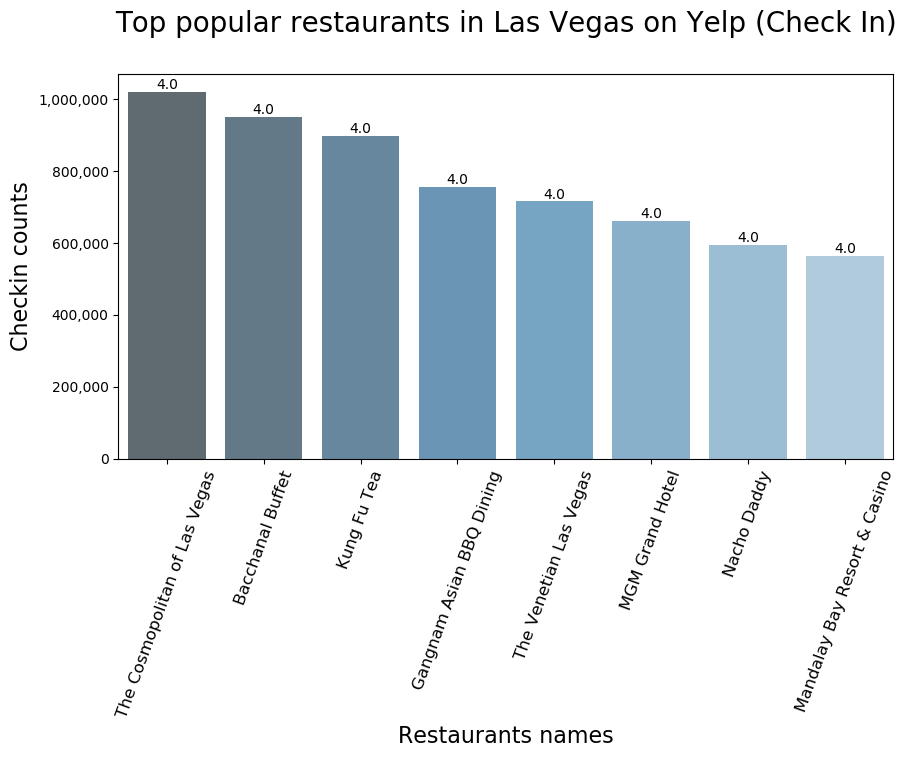

In [493]:
# top popular rated restaurants in Las Vegas:
top_pop = vegas_df.sort_values(by=['total_checkins'],ascending=False)[['name','total_checkins','stars']]
plt.figure(figsize=(10,5))
ax = sns.barplot(top_pop['name'][:30], top_pop['total_checkins'][:30], alpha=0.8, palette="Blues_d")

# To format the tick labels and make them more readable:
import matplotlib.ticker as tick 

plt.title('Top popular restaurants in Las Vegas on Yelp (Check In)',fontsize=20, pad=30.0) 
plt.xlabel('Restaurants names', fontsize=16)
plt.ylabel('Checkin counts', fontsize=16)
plt.xticks(rotation='70', fontsize=12)
rects = ax.patches
labels = top_pop['stars']

# The code below formats the tick labels on y-axis by inserting commas: for easier comprehension.
ax.get_yaxis().set_major_formatter(
    tick.FuncFormatter(lambda x, p: format(int(x), ',')))

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label, ha='center', va='bottom')
plt.show()

The color of the visual above helps understand the foot traffic numbers per restaurant. 

Now, off to the Part 3: **Modeling**.